In [1]:
import os
from glob import glob

import matplotlib.pyplot as plt
from top2vec import Top2Vec
from wordcloud import WordCloud

from config import Config
from risk_detection.utils import get_file_name_without_ext

In [2]:
base_dir = os.path.join(Config.top2vec_models_dir(), 'sic_group_industry_wise', '*')
model_filenames = glob(base_dir)

In [3]:
def generate_wordcloud(model, topic_num, filename=None, reduced=False):
    if reduced:
        word_score_dict = dict(zip(model.topic_words_reduced[topic_num], model.topic_word_scores_reduced[topic_num]))
    else:
        word_score_dict = dict(zip(model.topic_words[topic_num], model.topic_word_scores[topic_num]))
    plt.figure(figsize=(20, 12),
                   dpi=200)
    plt.axis("off")
    fig = WordCloud(width=2000, height=1200,
                    background_color='white').generate_from_frequencies(word_score_dict)
    plt.imshow(fig)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    
    plt.title("Topic " + str(topic_num), loc='left', fontsize=25, pad=20)

In [4]:
models = dict()
for model_name in model_filenames:
    sic_group_name, _ = get_file_name_without_ext(model_name).split('_')
    models[sic_group_name] = Top2Vec.load(model_name)

In [5]:
print('SIC Group Name\t-->\tNumber of Topics, Size of Corpus')
for name, model in models.items():
    print(f'{name}\t\t-->\t{model.get_num_topics()}, {len(model.document_ids)}')

SIC Group Name	-->	Number of Topics, Size of Corpus
B		-->	27, 1286
C		-->	2, 213
D		-->	176, 8650
E		-->	25, 1583
F		-->	13, 579
G		-->	25, 1242
H		-->	96, 4436
I		-->	60, 2986


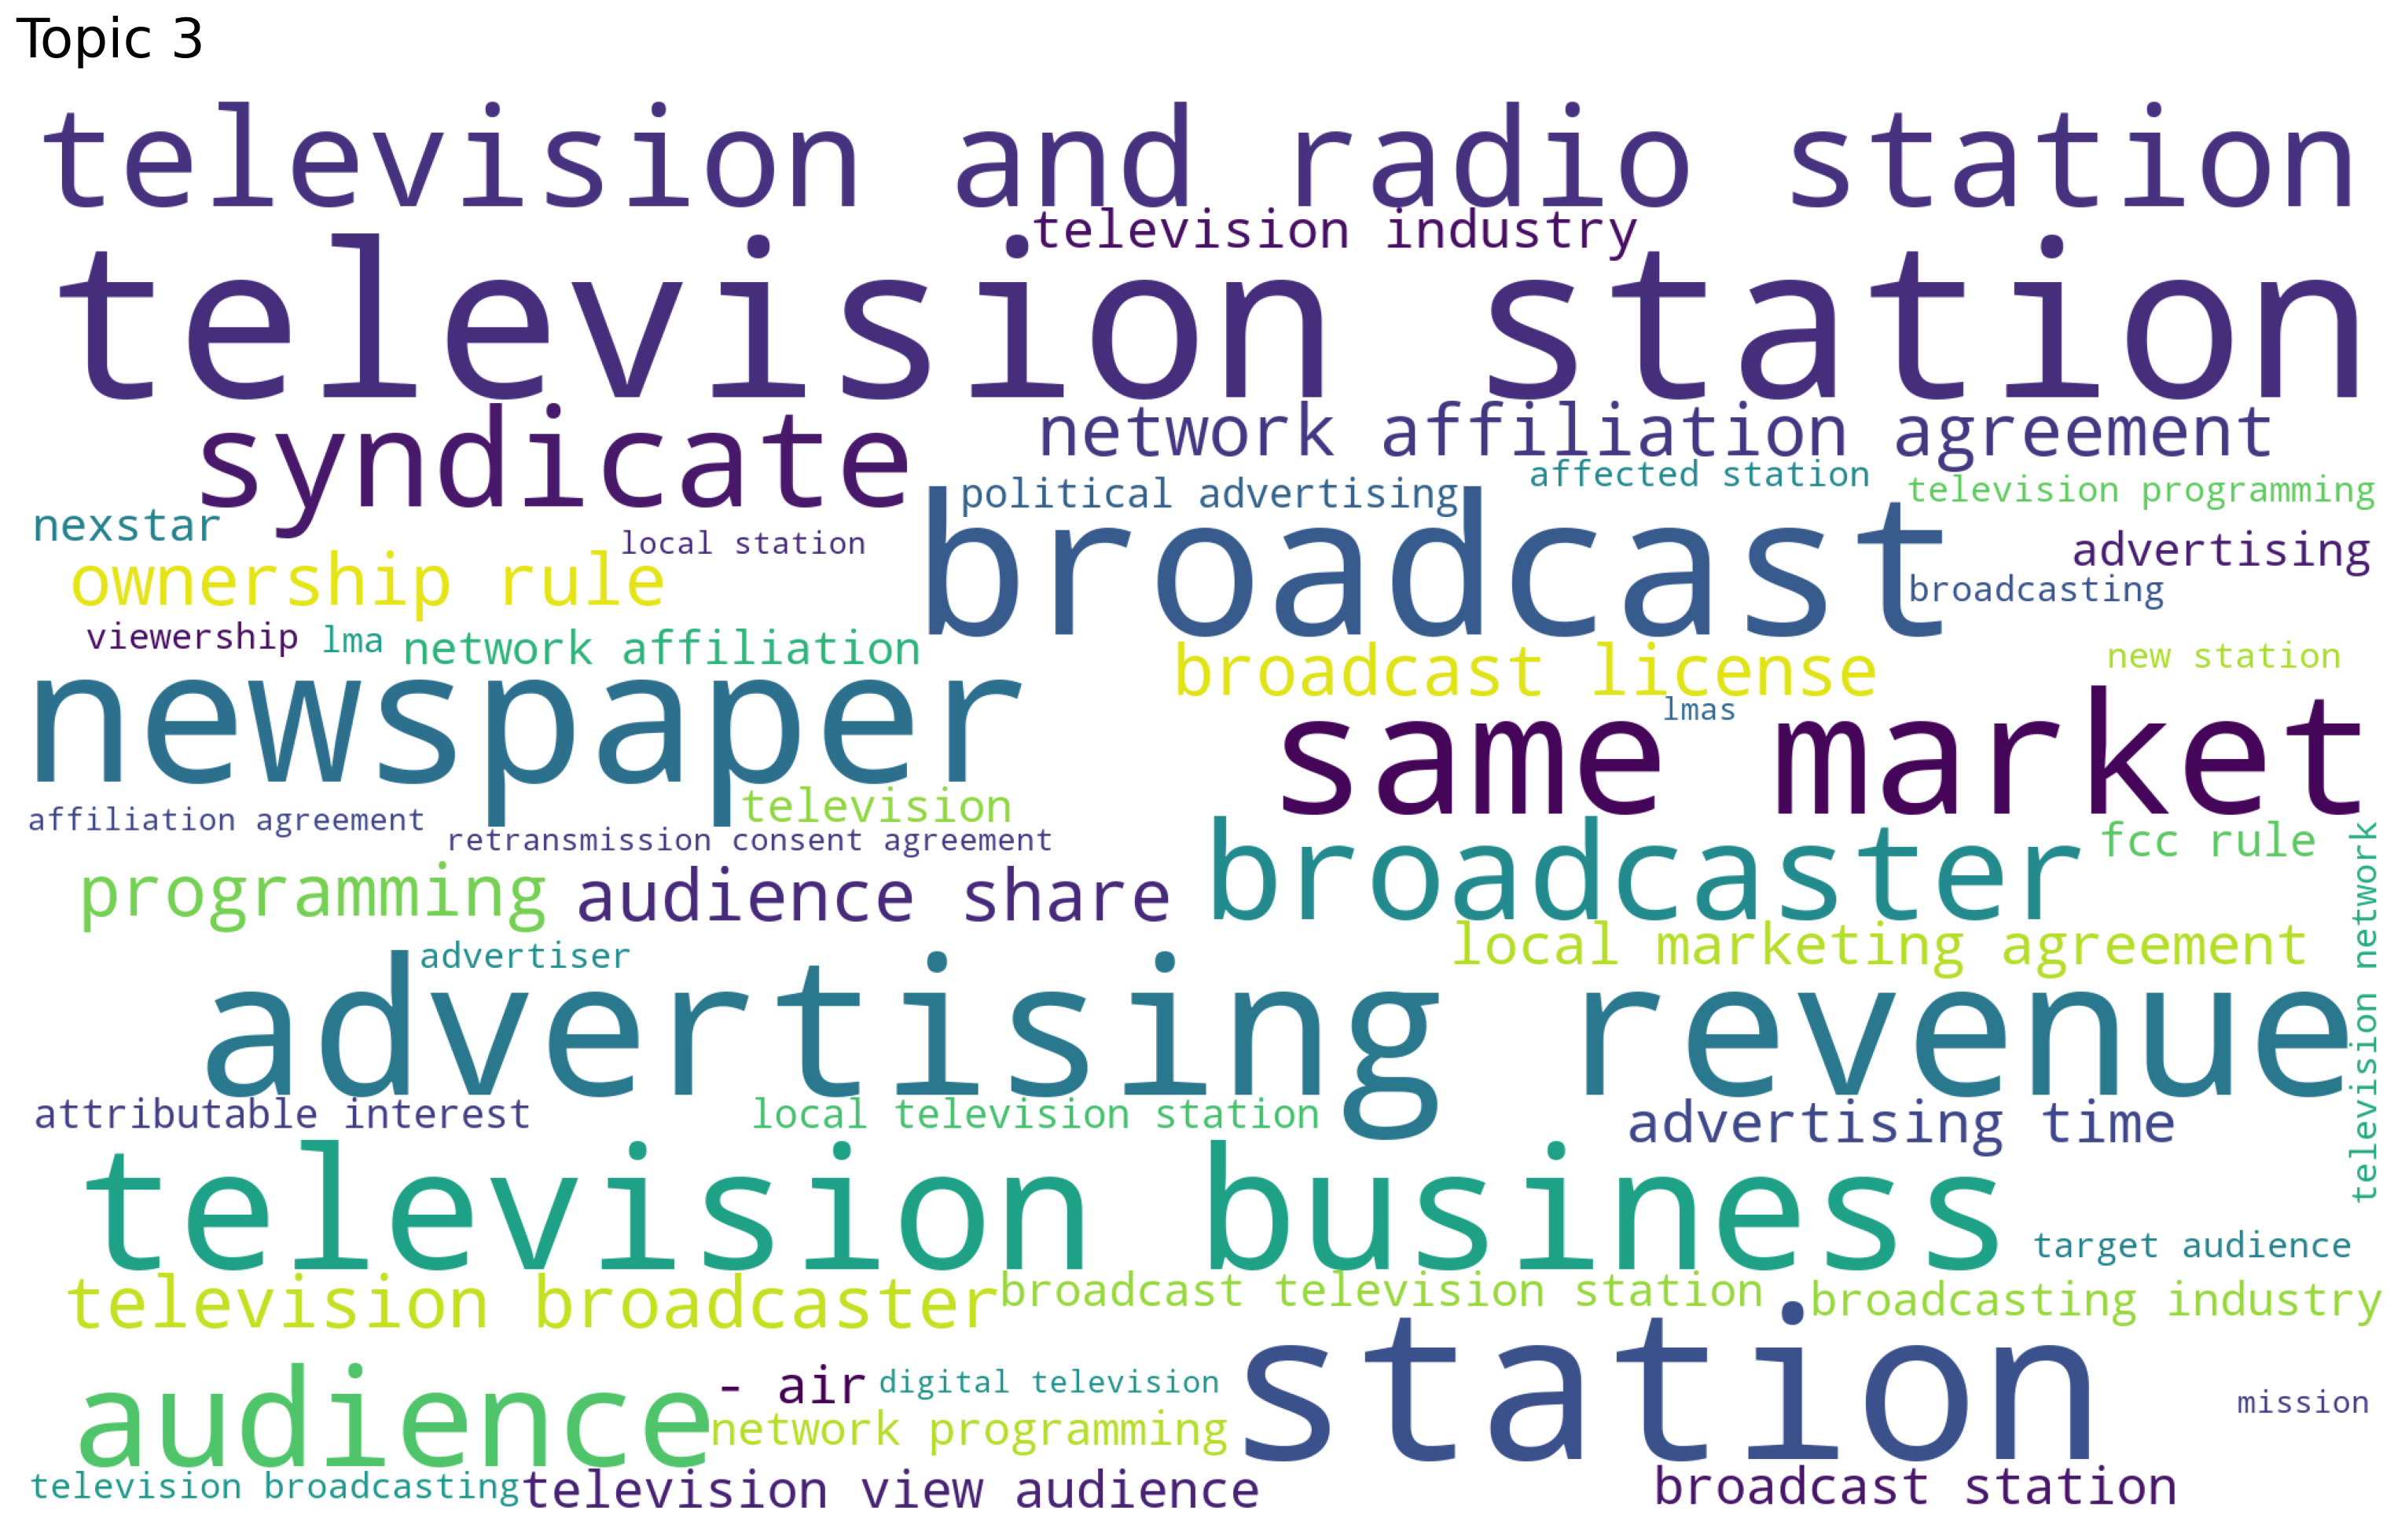

In [14]:
generate_wordcloud(models['E'], 3, filename='plots\\industry_tv.jpg')

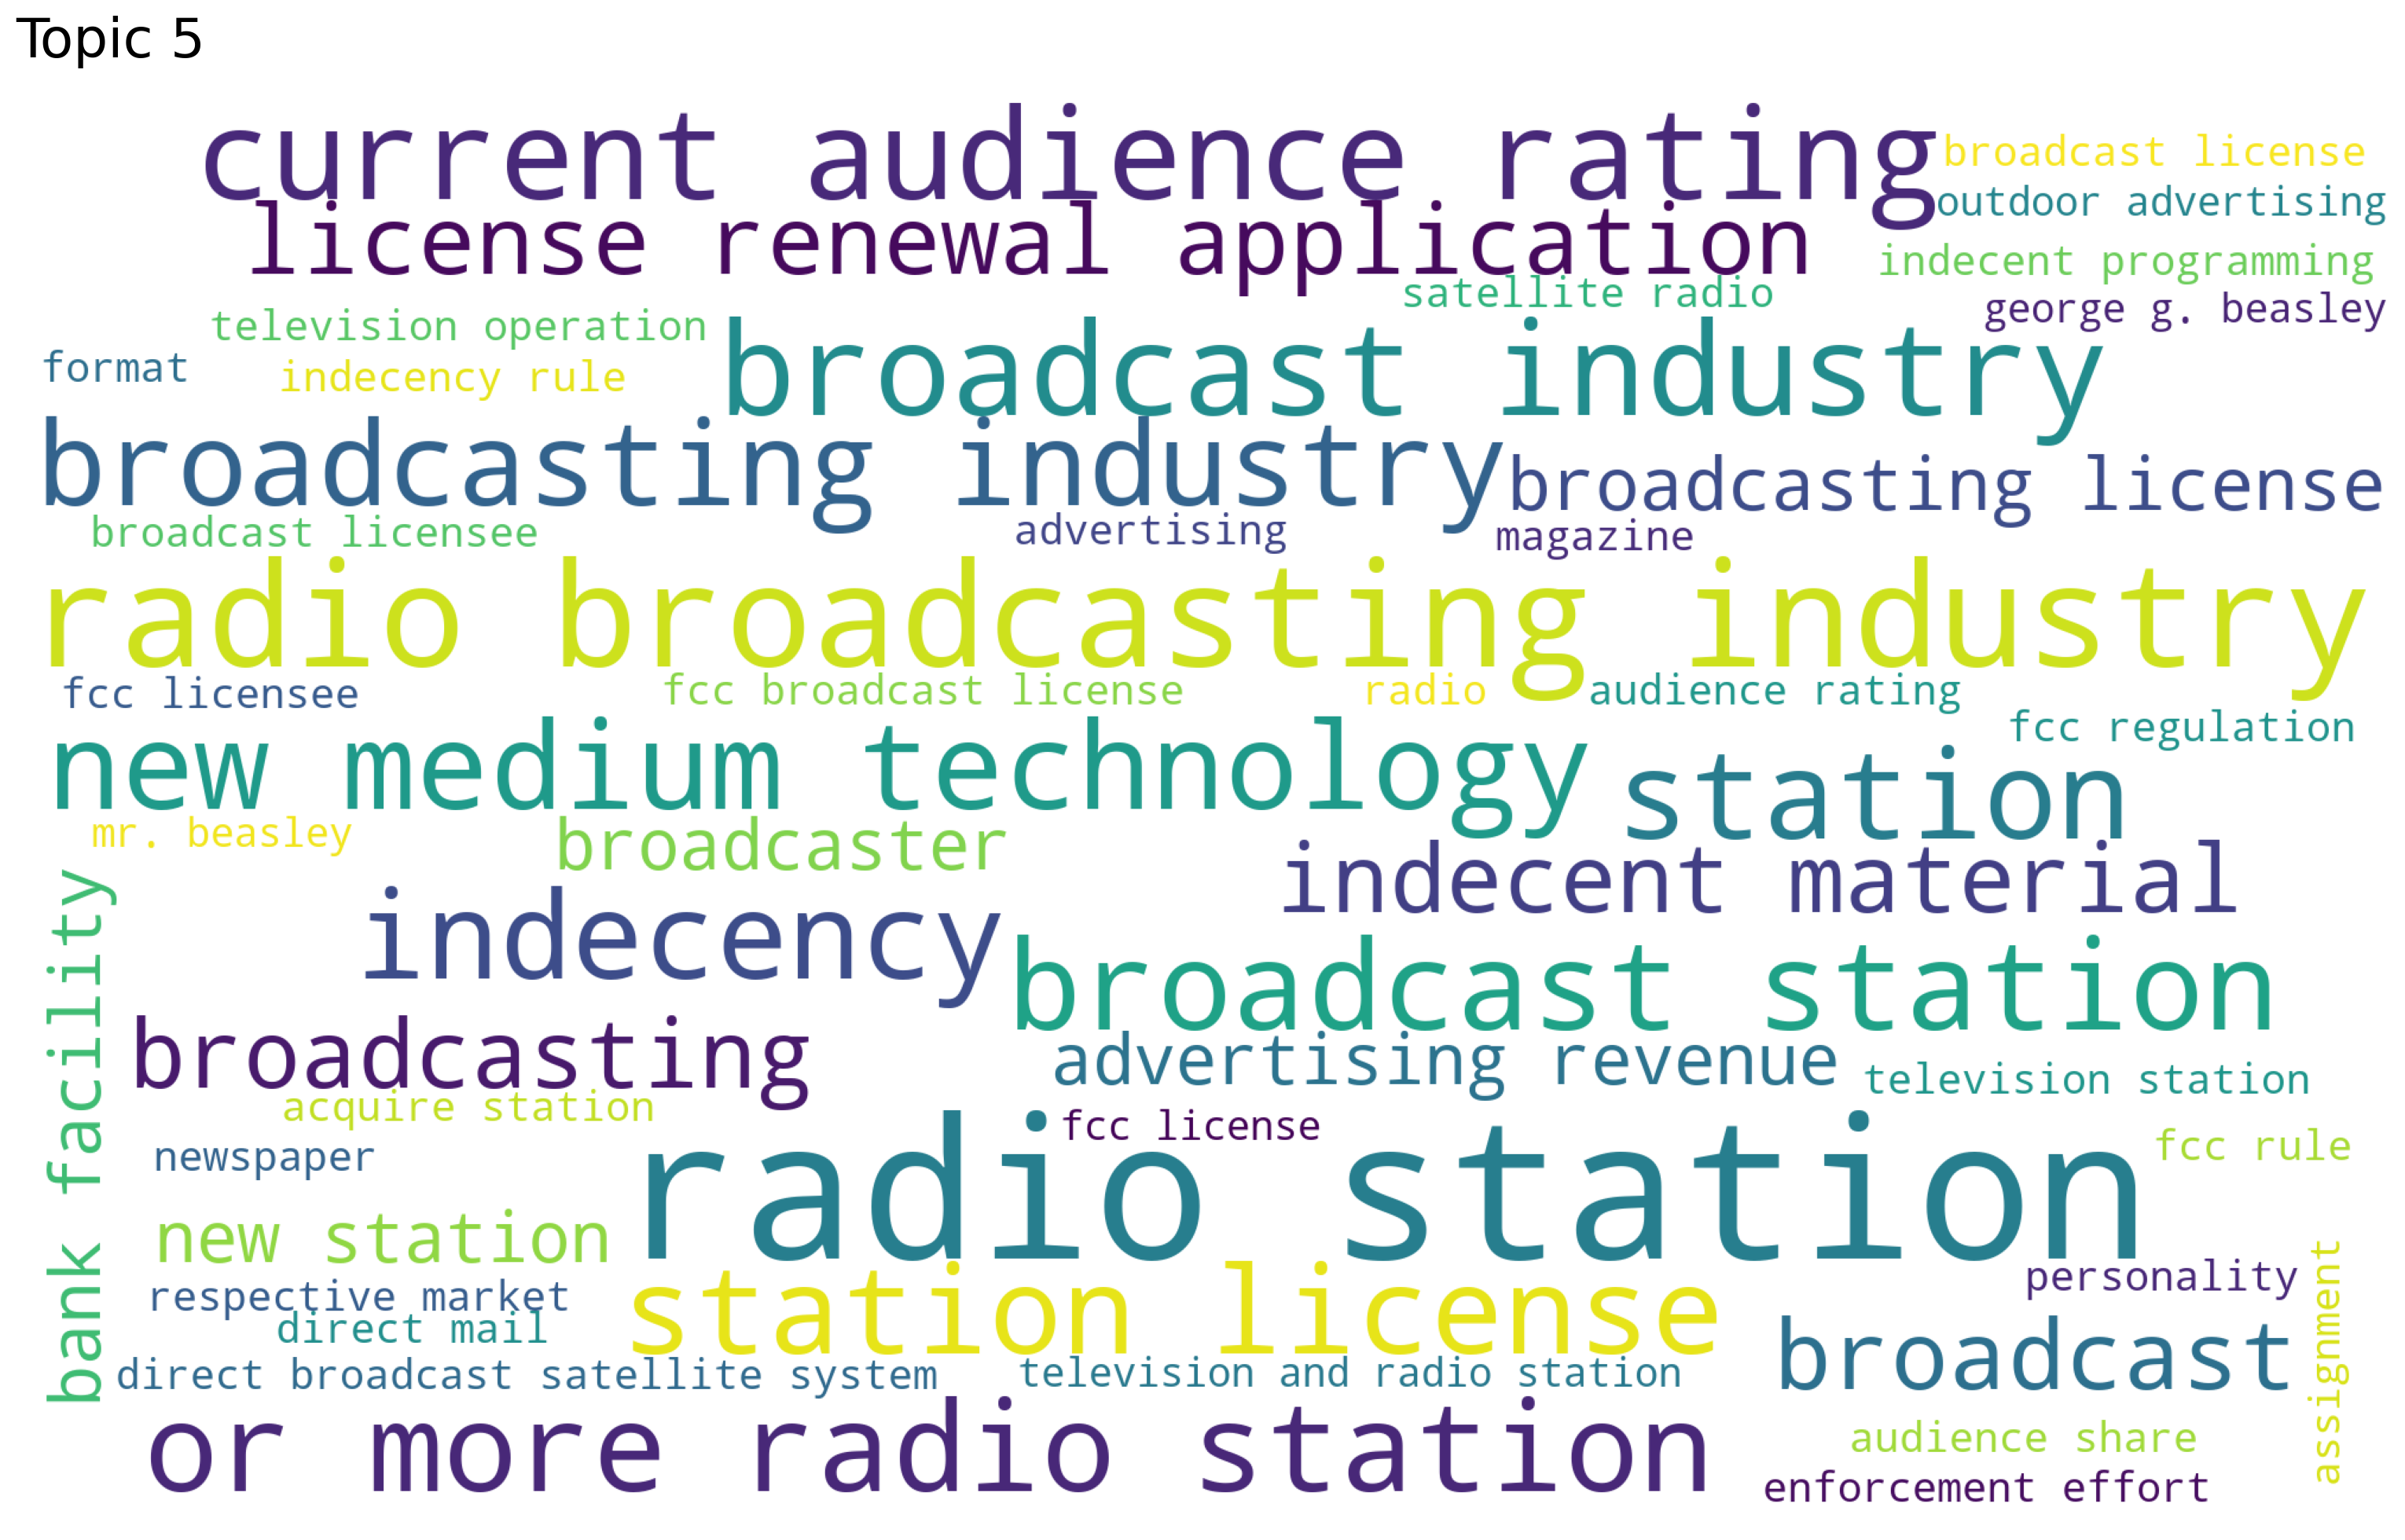

In [16]:
generate_wordcloud(models['E'], 5, filename='plots\\industry_tv_license.jpg')

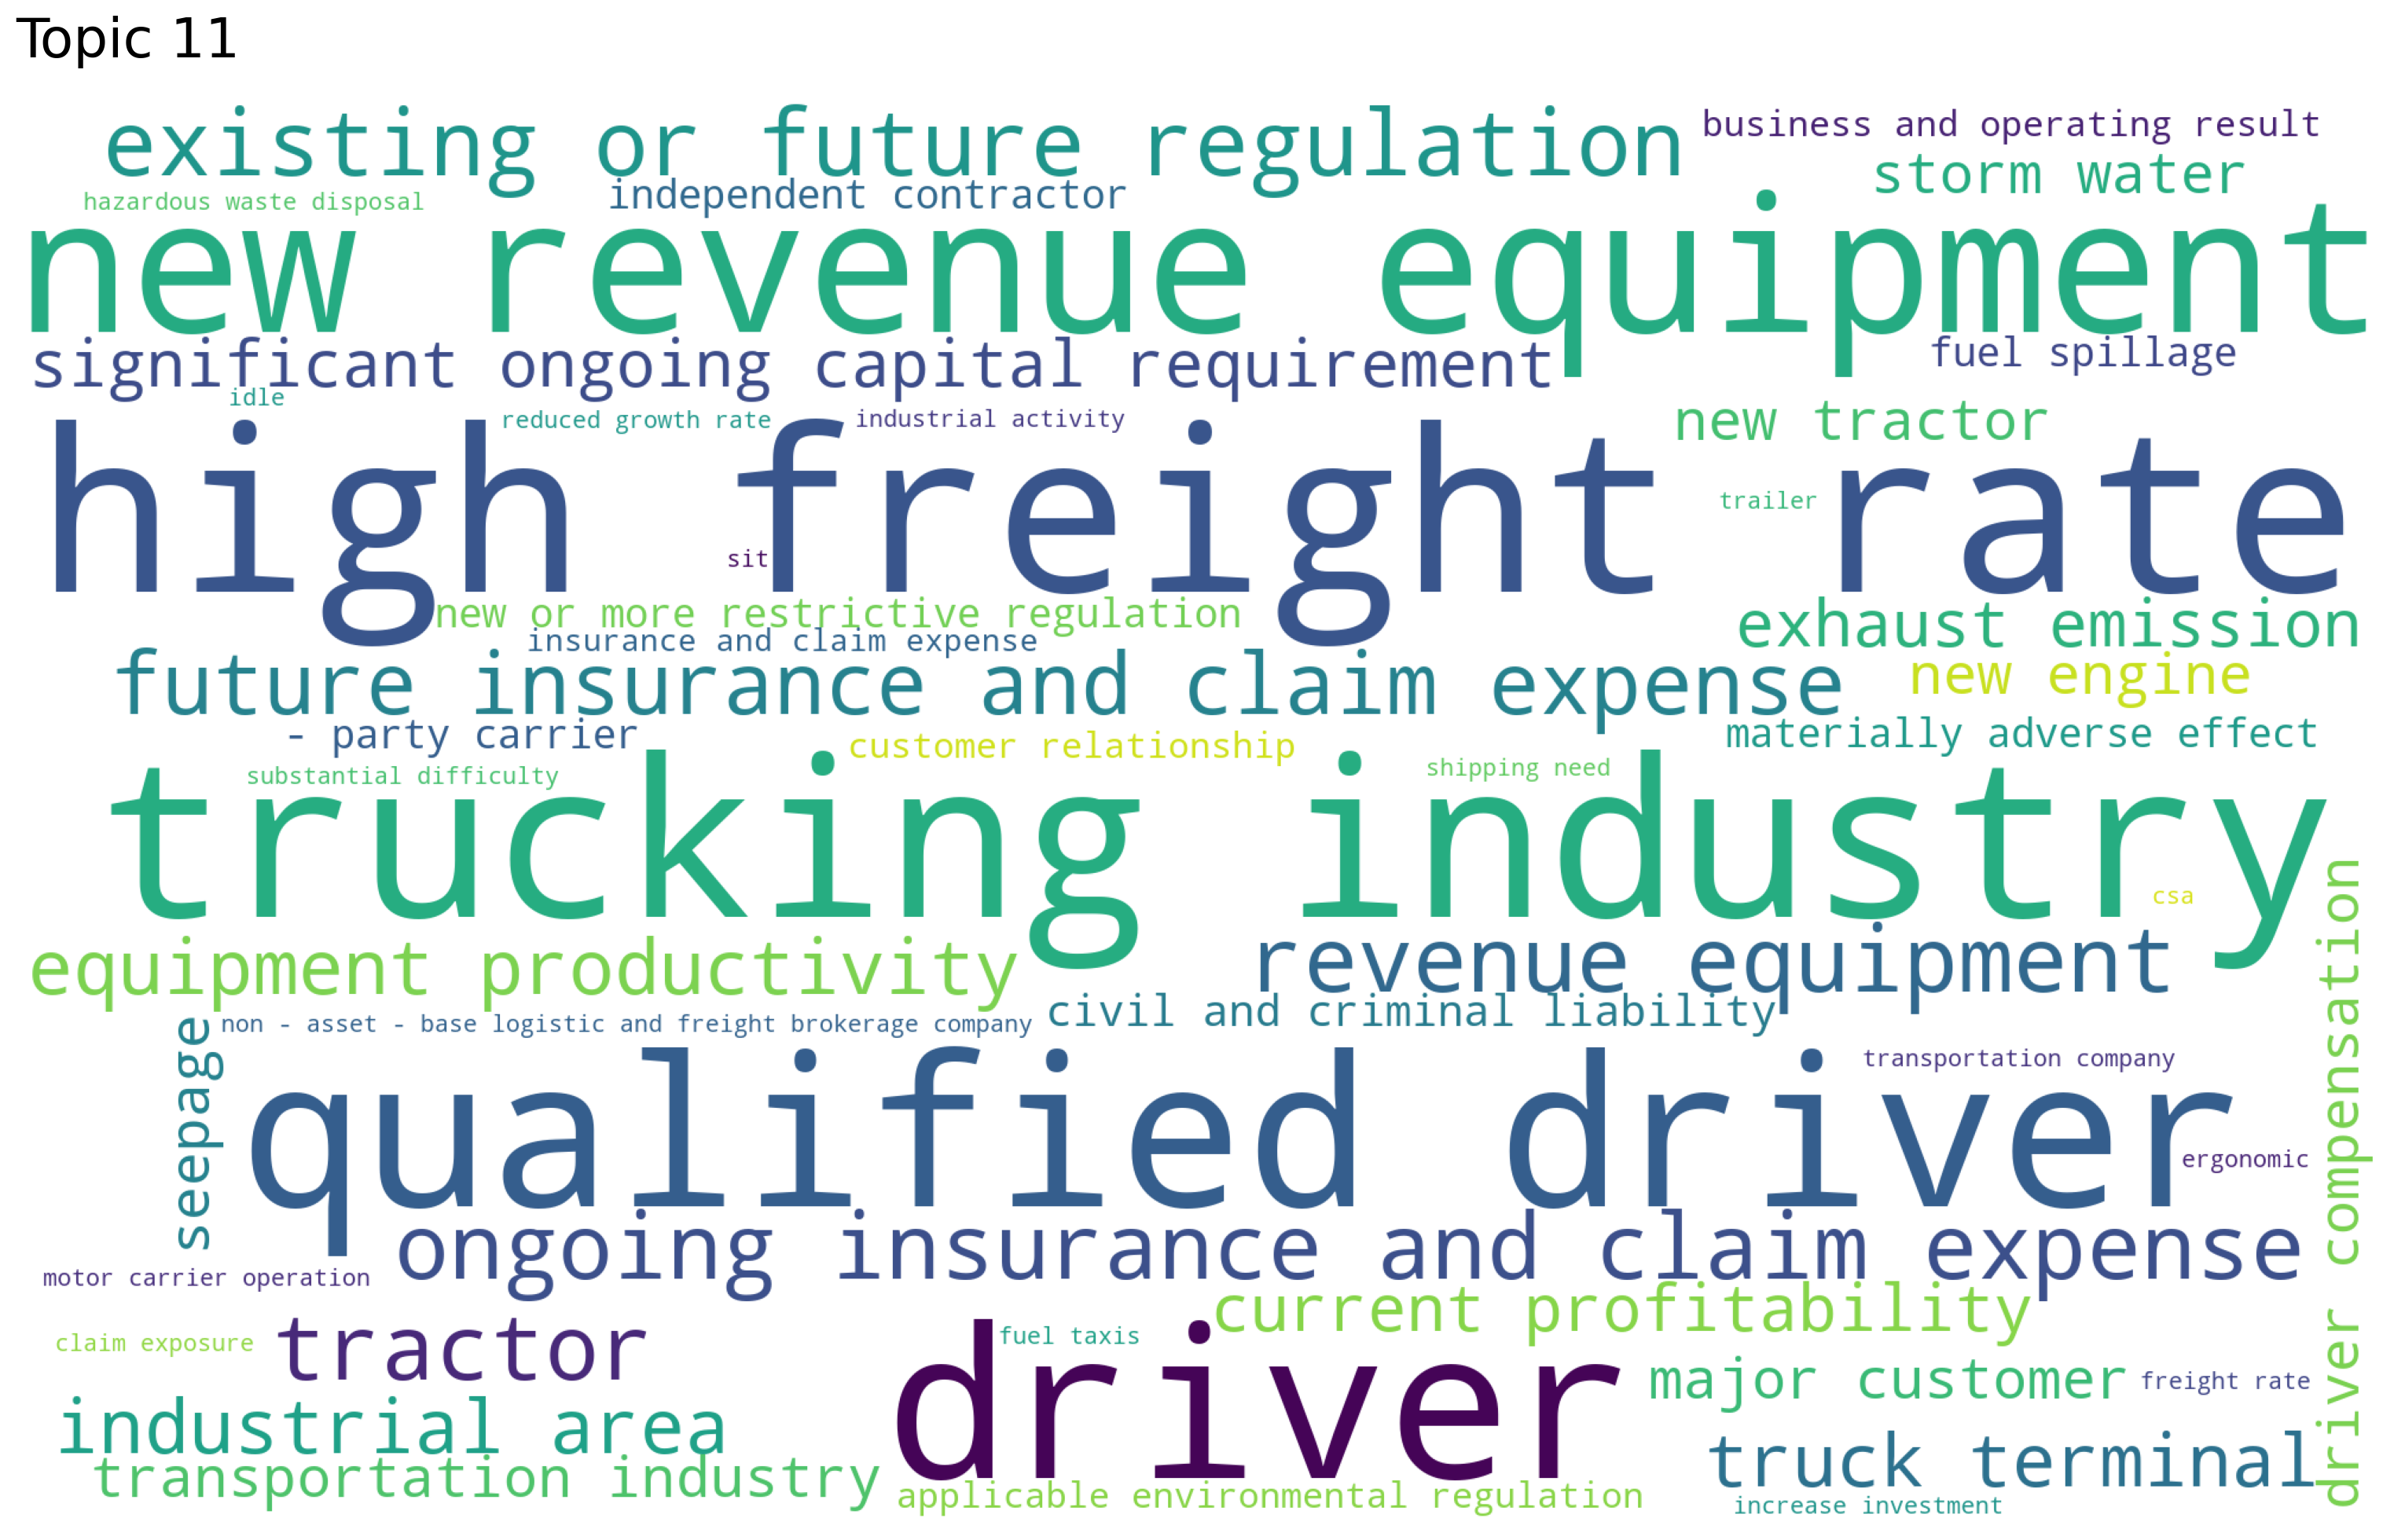

In [24]:
generate_wordcloud(models['E'], 11, filename='plots\\industry_transport.jpg')

# Entire Corpus

In [5]:
model = Top2Vec.load(os.path.join(Config.top2vec_models_dir(), 'top2vec_model_phrases'))

In [7]:
model.hierarchical_topic_reduction(num_topics=50)

[[189,
  59,
  293,
  58,
  161,
  155,
  311,
  77,
  399,
  445,
  128,
  410,
  290,
  421,
  255,
  245,
  482,
  319,
  159,
  489,
  422,
  508,
  106],
 [434, 42, 356, 401, 551, 269, 371, 275, 299, 304, 363, 418, 547, 561, 0],
 [78,
  116,
  102,
  511,
  49,
  448,
  100,
  270,
  199,
  258,
  303,
  510,
  166,
  428,
  99,
  198,
  178,
  308,
  296,
  408,
  7],
 [229,
  272,
  469,
  95,
  25,
  468,
  80,
  110,
  93,
  147,
  143,
  168,
  181,
  247,
  280,
  347,
  383,
  499,
  9],
 [390,
  218,
  36,
  387,
  259,
  456,
  68,
  500,
  231,
  121,
  139,
  548,
  86,
  297,
  111,
  169,
  227,
  246,
  295,
  238,
  324,
  50],
 [252, 518, 48, 165, 180, 460, 541, 1],
 [317,
  447,
  138,
  154,
  307,
  129,
  491,
  153,
  90,
  281,
  503,
  530,
  148,
  516,
  424,
  362,
  558,
  88,
  130,
  546,
  127,
  322,
  335,
  375,
  524,
  539,
  31],
 [413, 294, 24, 562, 27, 291, 471, 355, 379, 560, 368, 393, 446, 483, 502, 10],
 [346, 332, 474, 32, 156, 225, 249, 3

In [9]:
model.get_topics(reduced=True)

(array([['global business', 'global operation', 'low - cost country', ...,
         'lydall', 'titanium dioxide', 'legal compliance risk'],
        ['oil', 'exploration', 'drilling', ...,
         'oil and natural gas activity',
         'oil and natural gas exploration and production activity',
         'oil and natural gas business'],
        ['current and prospective customer', 'hardware product',
         'operating result', ..., 'sale opportunity', 'solution',
         'telecommunications industry'],
        ...,
        ['transportation industry', 'trucking industry',
         'qualified driver', ..., 'truckload service', 'eligible driver',
         'driver wage'],
        ['store location', 'store', 'qualified team member', ...,
         'natural food store', 'team members',
         'management and team member'],
        ['dealership', 'vehicle sale', 'new vehicle', ...,
         'repossess vehicle', 'service center chain store',
         'captive finance company']], dtype='<U6

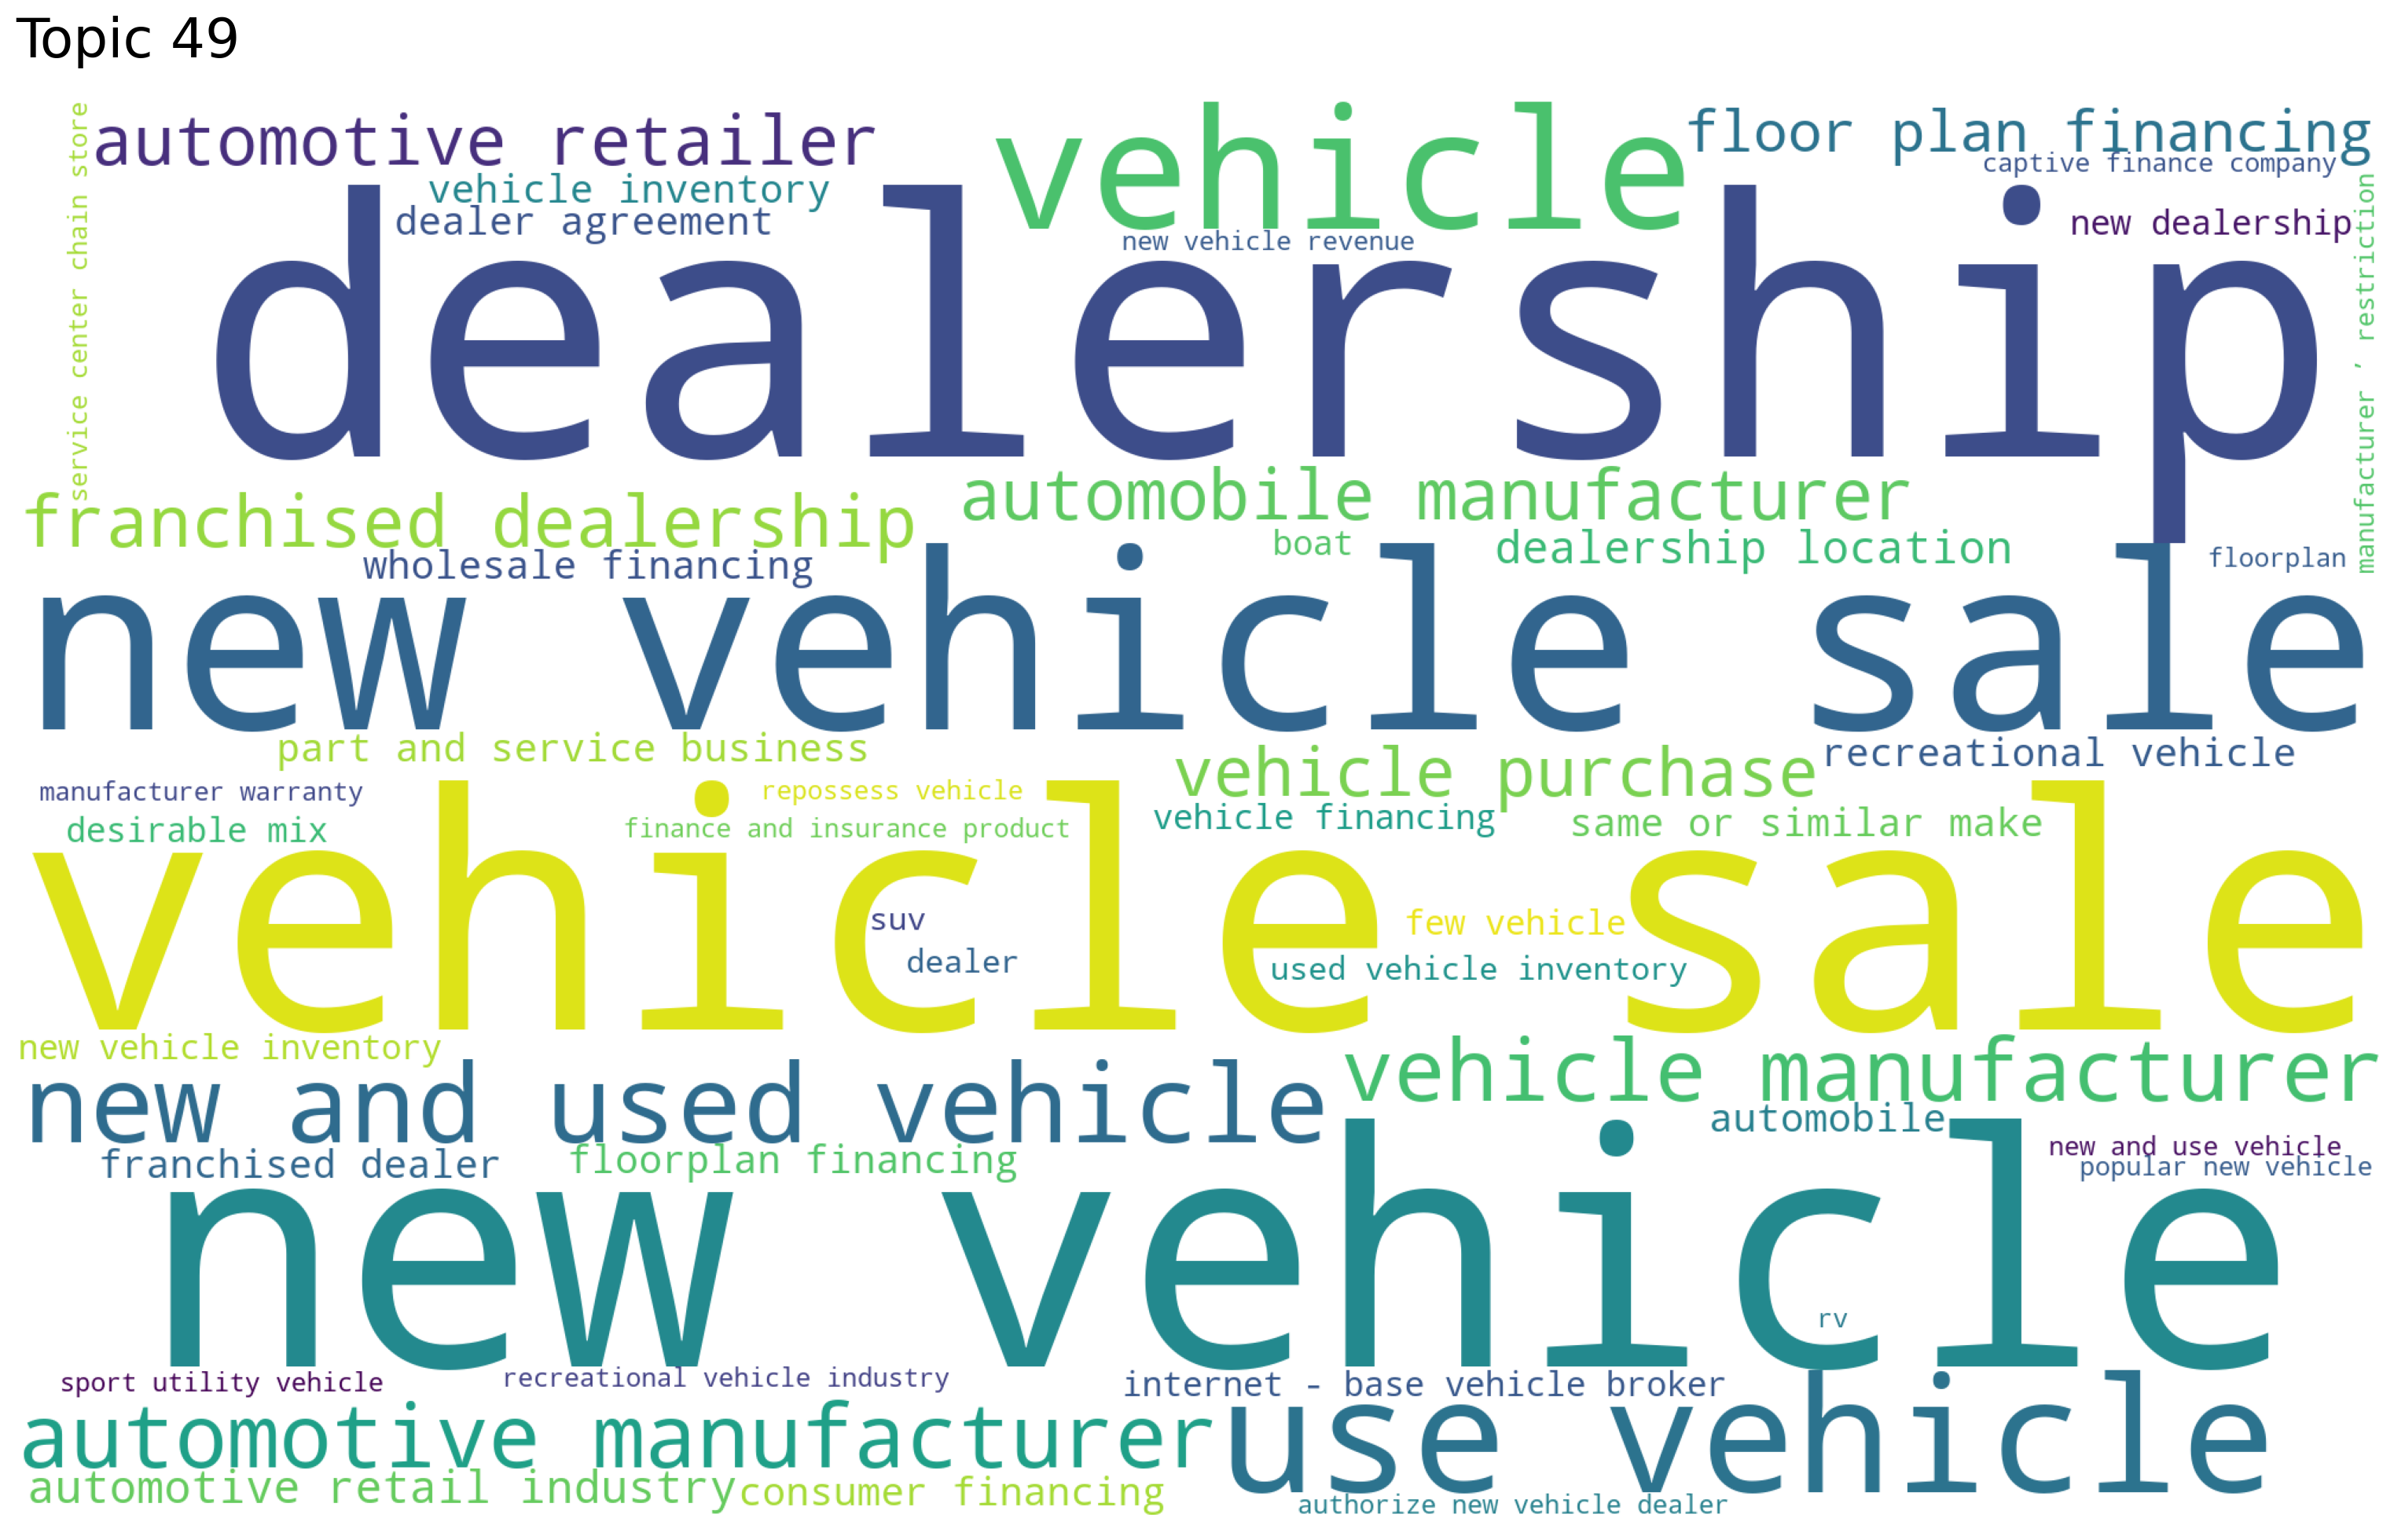

In [12]:
generate_wordcloud(model, 49, filename='plots\\entire_topic_49.jpg', reduced=True)

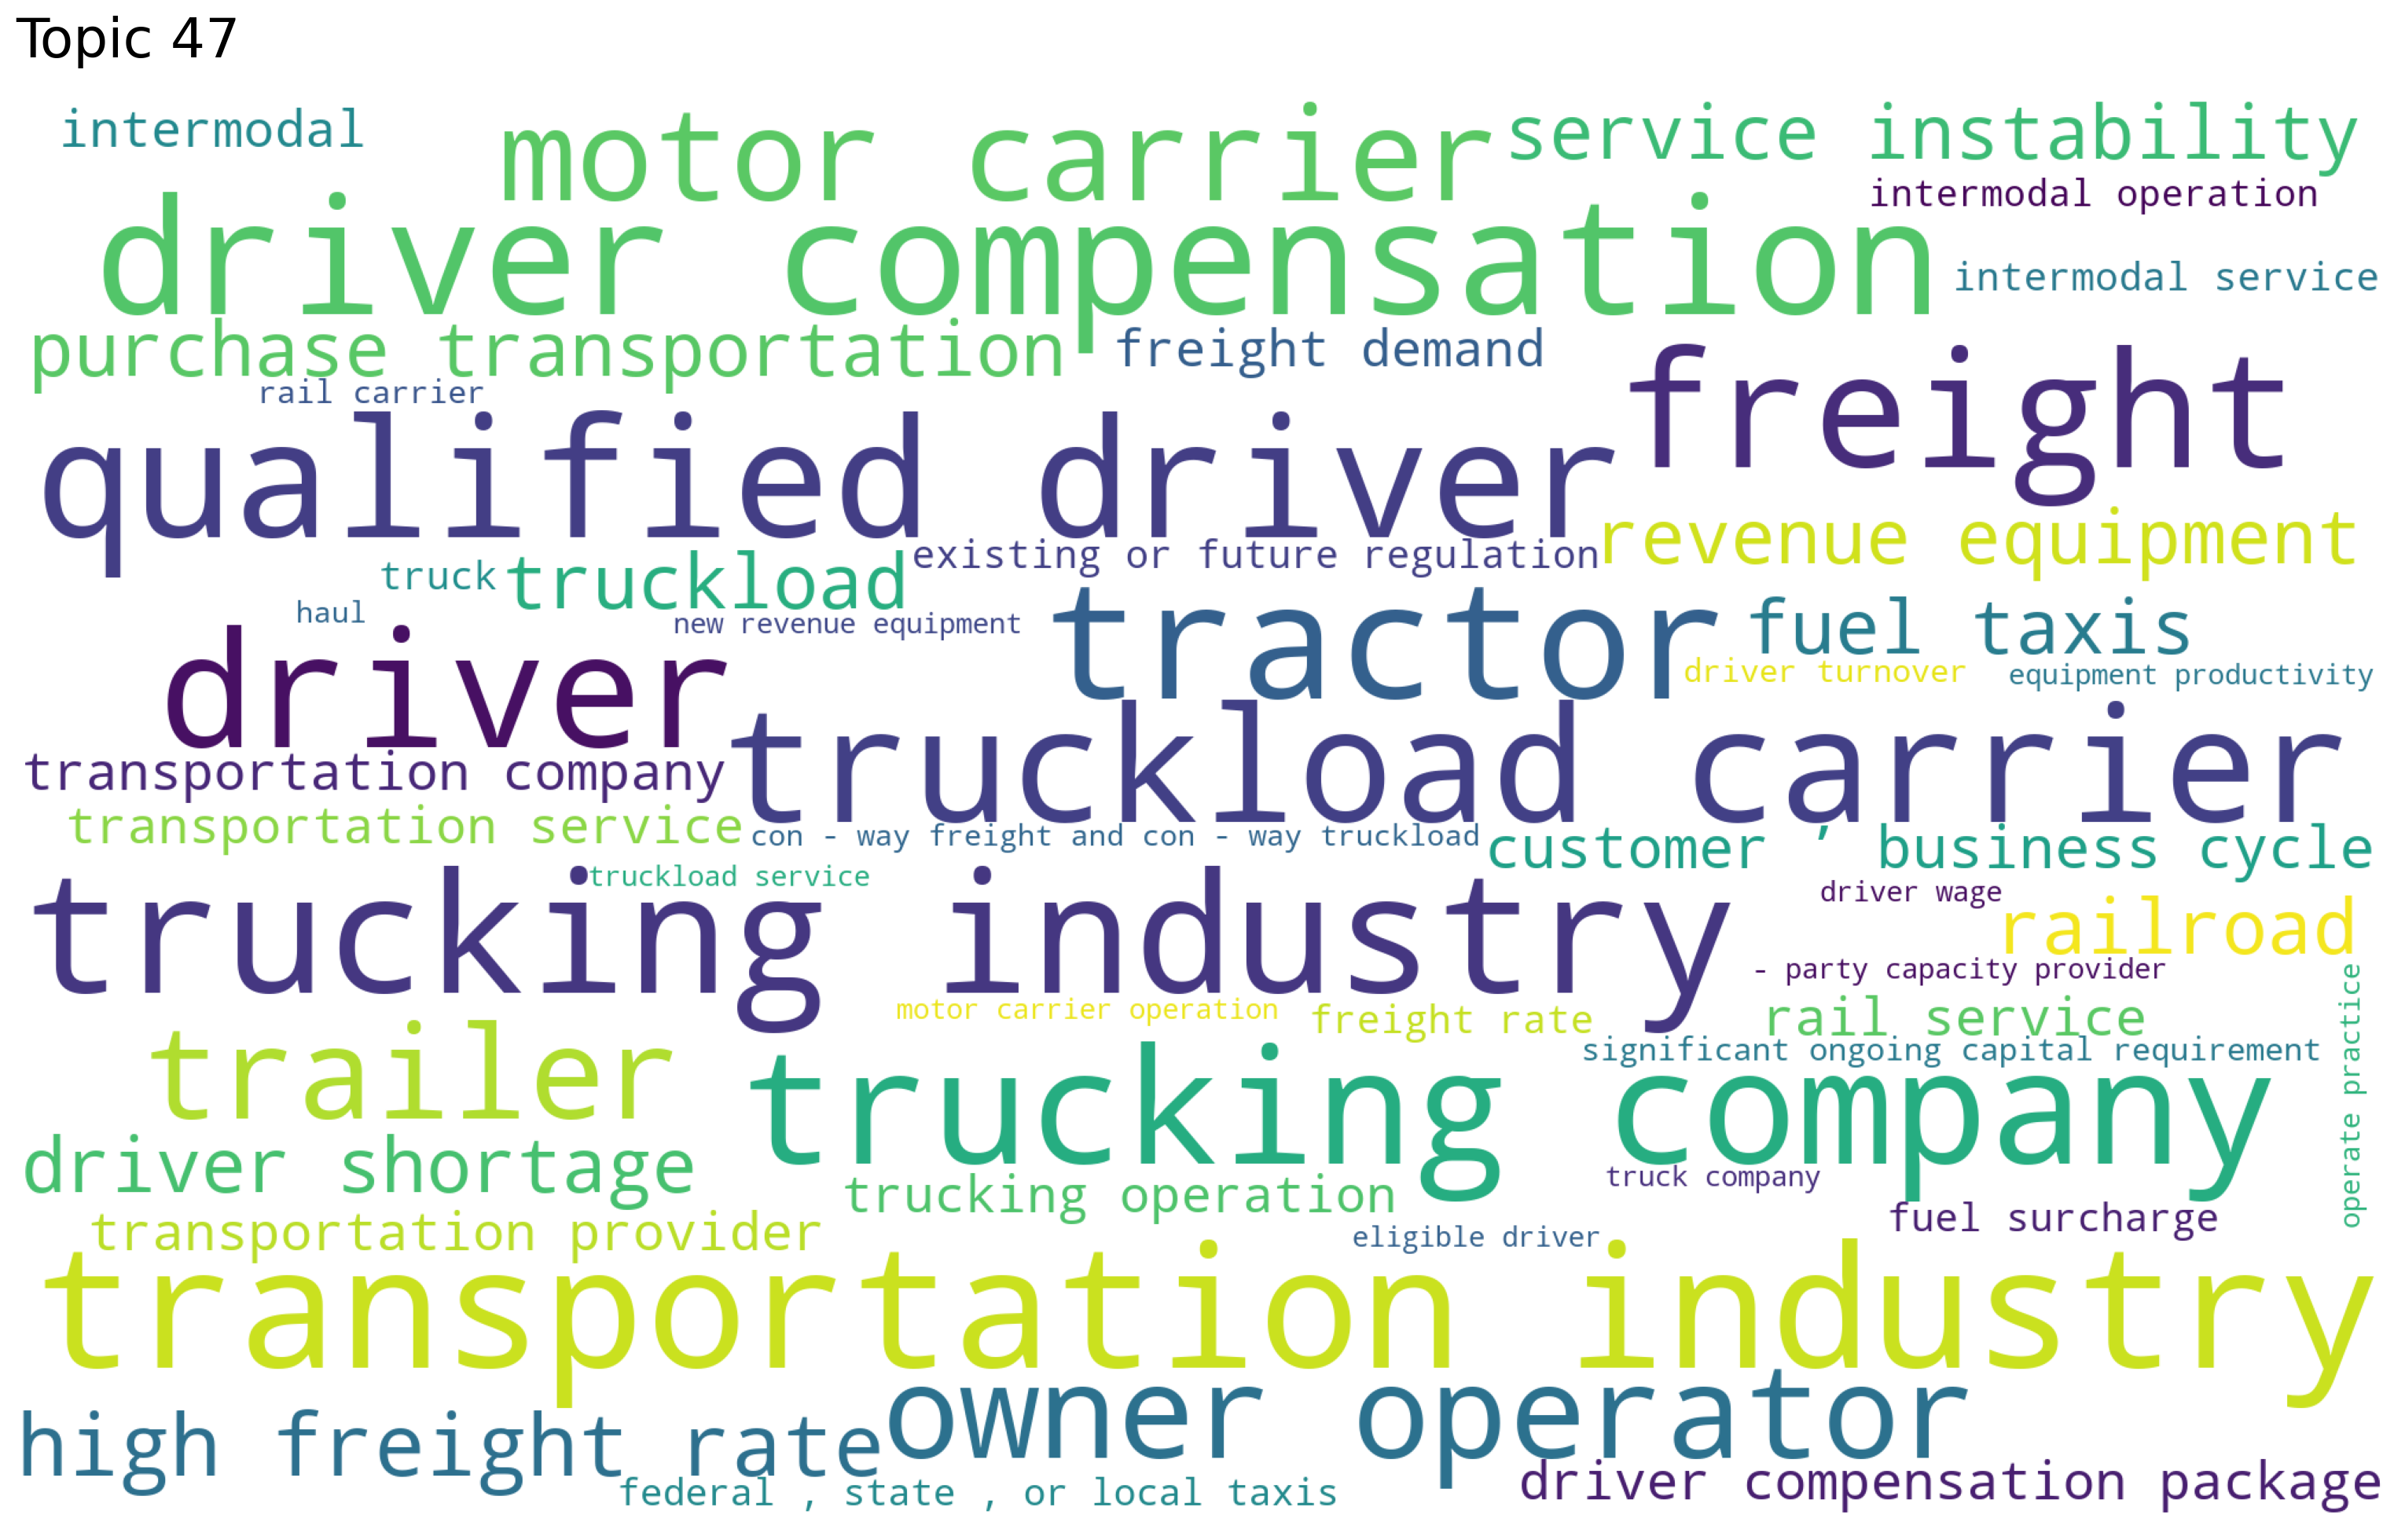

In [13]:
generate_wordcloud(model, 47, filename='plots\\entire_topic_47.jpg', reduced=True)